## Multiple Linear Regression



In [1]:
import pandas as pd

In [2]:
advertising_multi = pd.read_csv('advertising.csv')

In [3]:
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

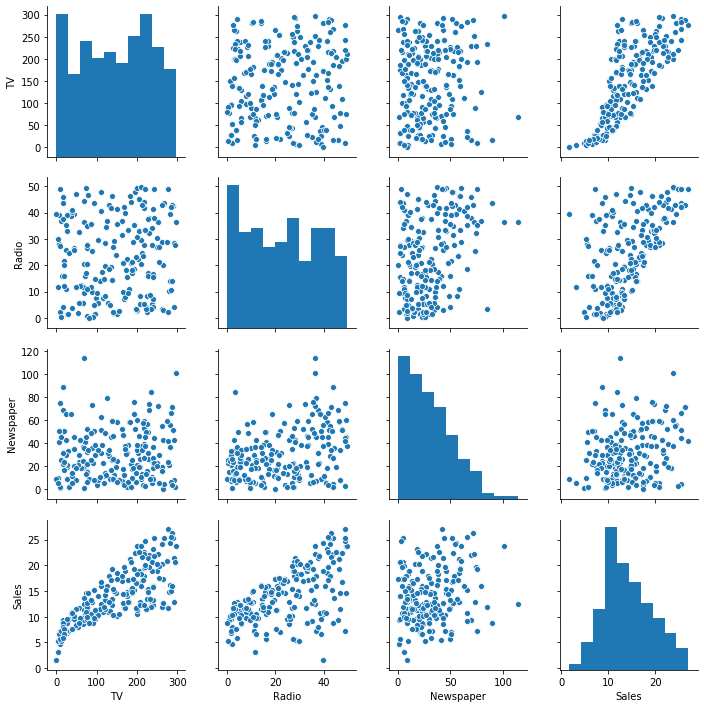

In [8]:
sns.pairplot(advertising_multi)

C:\Users\SOUROV SARKAR\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


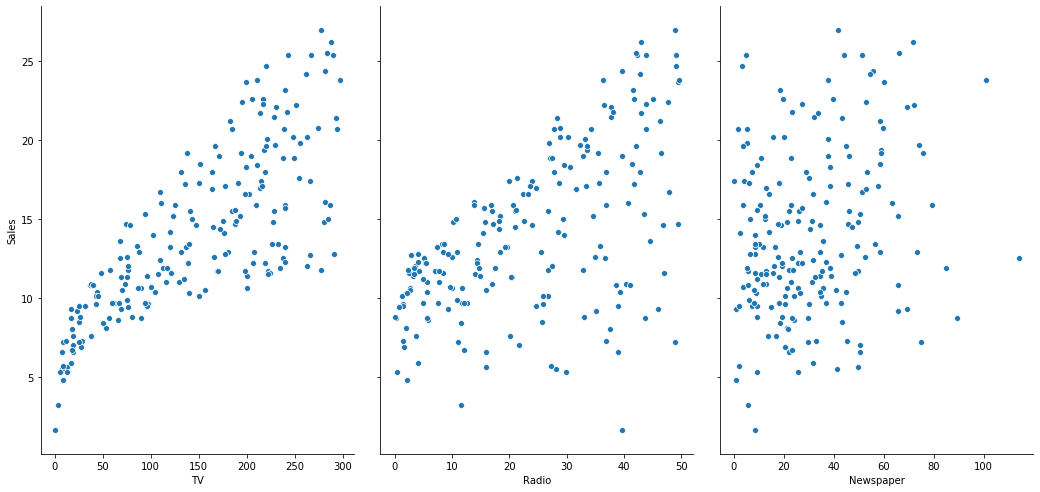

In [9]:
sns.pairplot(advertising_multi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [10]:

X = advertising_multi[['TV','Radio','Newspaper']]


y = advertising_multi['Sales']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(lm.intercept_)

2.6527896688794943


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [17]:
y_pred = lm.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [19]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636972
r_square_value : 0.9058622107532245


In [20]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train,X_train_sm).fit()
lm_1.params

C:\Users\SOUROV SARKAR\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
C:\Users\SOUROV SARKAR\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [21]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           9.97e-66
Time:                        23:30:09   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

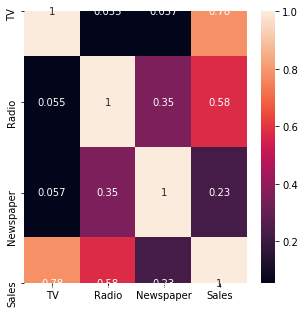

In [23]:
plt.figure(figsize = (5,5))
sns.heatmap(advertising_multi.corr(),annot = True)

In [24]:
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [25]:
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred_new = lm.predict(X_test_new)

Text(0, 0.5, 'Sales')

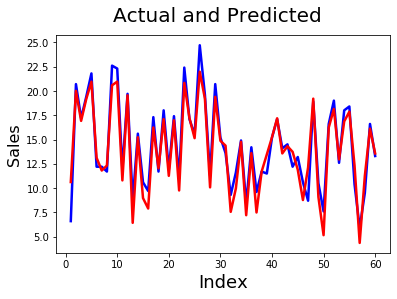

In [27]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)                               

Text(0, 0.5, 'ytest-ypred')

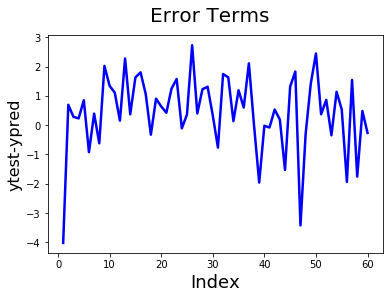

In [28]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)                

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [30]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.784740052090281
r_square_value : 0.909216449171822


In [31]:
X_train_final = X_train_new
X_train_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           4.46e-67
Time:                        23:31:00   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

C:\Users\SOUROV SARKAR\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
from sklearn.feature_selection import RFE

In [33]:
rfe = RFE(lm, 2)

In [34]:
rfe = rfe.fit(X_train, y_train)

In [35]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


In [37]:
import pandas as pd
import numpy as np

advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 , 
                                                    random_state=110)

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657
